## 비트코인 예측 : Facebook rophet 활용

In [ ]:
# 설치 : conda install -c conda-forge fbprophet

In [1]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 사용 데이터 : market-price_3y.csv
# 주의 : 
# Prophet을 사용하기 위해서는 피처 이름이 'ds'와 'y'로 고정되어야 함

In [5]:
file_path = './data/market-price_3y.csv'
bitcoin_df = pd.read_csv(file_path, names =['ds', 'y'], header=0)
bitcoin_df

,ds,y
0,2018-09-15 00:00:00,6487.12
1,2018-09-16 00:00:00,6522.39
2,2018-09-17 00:00:00,6497.37
3,2018-09-18 00:00:00,6253.99
4,2018-09-19 00:00:00,6342.39
...,...,...
1090,2021-09-09 00:00:00,46078.38
1091,2021-09-10 00:00:00,46368.69
1092,2021-09-11 00:00:00,44847.48
1093,2021-09-12 00:00:00,45144.79


In [7]:
# 학습/예측에 사용할 데이터
train_df = bitcoin_df.iloc[:1090]
train_df

,ds,y
0,2018-09-15 00:00:00,6487.12
1,2018-09-16 00:00:00,6522.39
2,2018-09-17 00:00:00,6497.37
3,2018-09-18 00:00:00,6253.99
4,2018-09-19 00:00:00,6342.39
...,...,...
1085,2021-09-04 00:00:00,50035.33
1086,2021-09-05 00:00:00,49947.38
1087,2021-09-06 00:00:00,51769.06
1088,2021-09-07 00:00:00,52677.40


In [10]:
# 실제값으로 사용 : 예측한 값과 비교할 값
test_df = bitcoin_df.tail()
test_df

,ds,y
1090,2021-09-09 00:00:00,46078.38
1091,2021-09-10 00:00:00,46368.69
1092,2021-09-11 00:00:00,44847.48
1093,2021-09-12 00:00:00,45144.79
1094,2021-09-13 00:00:00,46059.12


In [11]:
# 모델 생성
prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [13]:
# 5일 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

In [14]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
1090,2021-09-09,9273.970615,49144.485735,52705.445601,9273.970615,9273.970615,4.977728,4.977728,4.977728,4.492940,...,0.000404,0.000404,0.000404,-0.485192,-0.485192,-0.485192,0.0,0.0,0.0,50941.366301
1091,2021-09-10,9290.885430,49256.500425,53054.165308,9290.885430,9290.885430,4.977728,4.977728,4.977728,4.493269,...,-0.018549,-0.018549,-0.018549,-0.465910,-0.465910,-0.465910,0.0,0.0,0.0,51037.333685
1092,2021-09-11,9307.800244,49880.316917,53571.516778,9307.800244,9307.800244,4.977728,4.977728,4.977728,4.556210,...,0.027183,0.027183,0.027183,-0.448701,-0.448701,-0.448701,0.0,0.0,0.0,51716.097111
1093,2021-09-12,9324.715059,50057.863900,53642.215142,9324.715059,9324.715059,4.977728,4.977728,4.977728,4.560525,...,0.017100,0.017100,0.017100,-0.434303,-0.434303,-0.434303,0.0,0.0,0.0,51850.306955
1094,2021-09-13,9341.629874,50137.969780,53758.088843,9341.629874,9341.629874,4.977728,4.977728,4.977728,4.561192,...,0.006894,0.006894,0.006894,-0.423431,-0.423431,-0.423431,0.0,0.0,0.0,51950.596359


In [15]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2021-09-09,50941.366301,49144.485735,52705.445601
1091,2021-09-10,51037.333685,49256.500425,53054.165308
1092,2021-09-11,51716.097111,49880.316917,53571.516778
1093,2021-09-12,51850.306955,50057.863900,53642.215142
1094,2021-09-13,51950.596359,50137.969780,53758.088843


### 결과 시각화

In [ ]:
# 전체 데이터를 기반으로 학습한 뒤, 다음 5일 단위 예측 결과 시각화

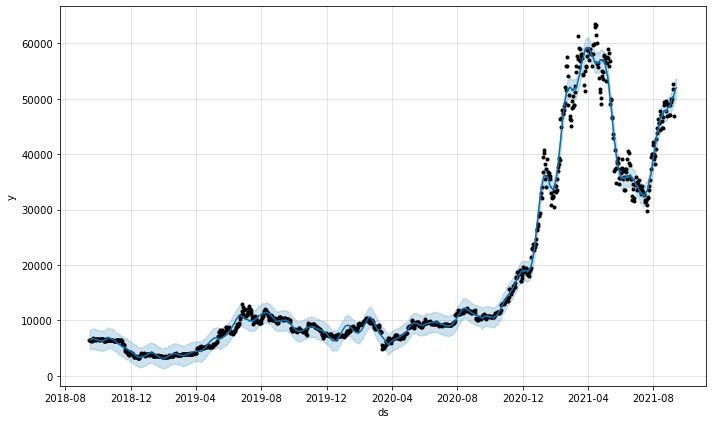

In [17]:
fig1 = prophet.plot(forecast_data)

In [ ]:
# seasonality_mode로 설정한 기간별 트렌드 정보 시각화

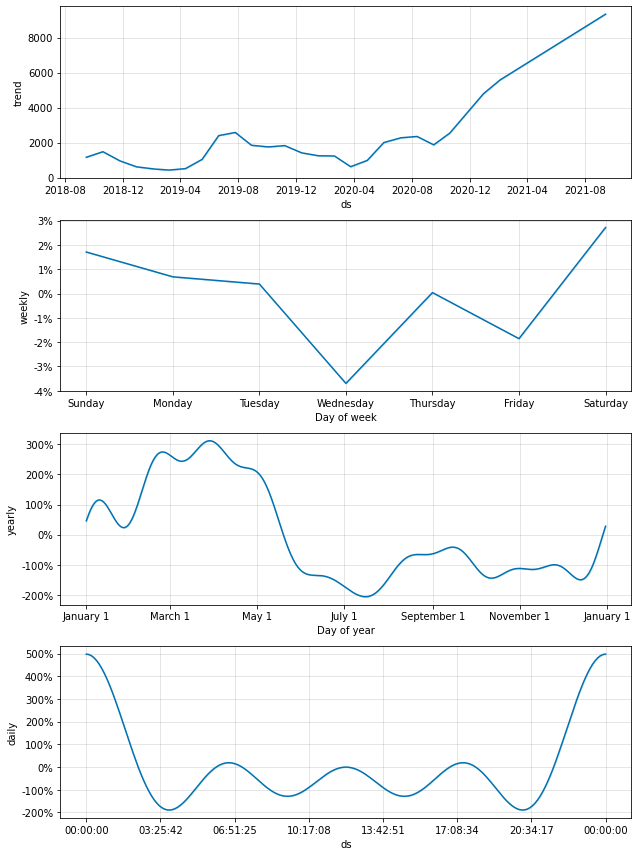

In [18]:
fig2 = prophet.plot_components(forecast_data)

In [24]:
y = test_df['y']

In [25]:
f = forecast_data['yhat'].tail()

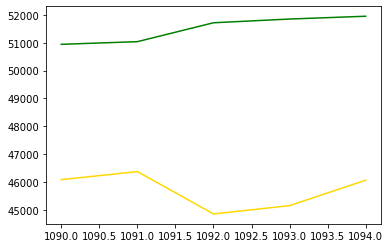

In [26]:
plt.plot(y, color='gold') # 모델이 예상한 가격 그래프
plt.plot(f, color='green') 